<a href="https://colab.research.google.com/github/springtimeofyouth/AlgerianForestFire/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install kaggle
!pip install -q kaggle

In [105]:
#from google.colab import files
#files.upload()

In [3]:
#create a kaggle directory
! mkdir ~/.kaggle

In [4]:
#copy the json file to the folder created
! cp kaggle.json ~/.kaggle/

In [5]:
#Grant Permission
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# to list all the datasets in kaggle
! kaggle datasets list

ref                                                      title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023          Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          11253        375  1.0              
nelgiriyewithana/top-spotify-songs-2023                  Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           1371         58  1.0              
joebeachcapital/drug-overdose-deaths                     Drug Overdose Deaths                           590KB  2023-08-28 05:52:05            453         24  1.0              
joebeachcapital/life-longevity-factors                   Life Longevity Factors                           8KB  2023-08-2

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:15<00:00, 101MB/s] 
100% 2.29G/2.29G [00:15<00:00, 160MB/s]


In [8]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# What is Pneumonia ?
From Mayo Clinic's Article on pneumonia

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

![Pneumonia](https://img.freepik.com/free-vector/pneumonia-realistic-infographic_1284-59342.jpg?w=2000)

Symptoms :
* Chest pain when you breathe or cough
* Confusion or changes in mental awareness (in adults age 65 and older)
* Cough, which may produce phlegm
* Fatigue
* Fever, sweating and shaking chills
* Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
* Nausea, vomiting or diarrhea
* Shortness of breath




# Importing the necessary libraries

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

## Dataset description
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

In [10]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))     # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

## Loading the Dataset

In [11]:
train = get_data('chest_xray/chest_xray/train')
test = get_data('chest_xray/chest_xray/test')
val = get_data('chest_xray/chest_xray/val')

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-10-2929da9c4937>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



# Data Visualization & Preprocessing

##### Let's check out the dataset we're working on by picking out two data points from the dataset.

In [12]:
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

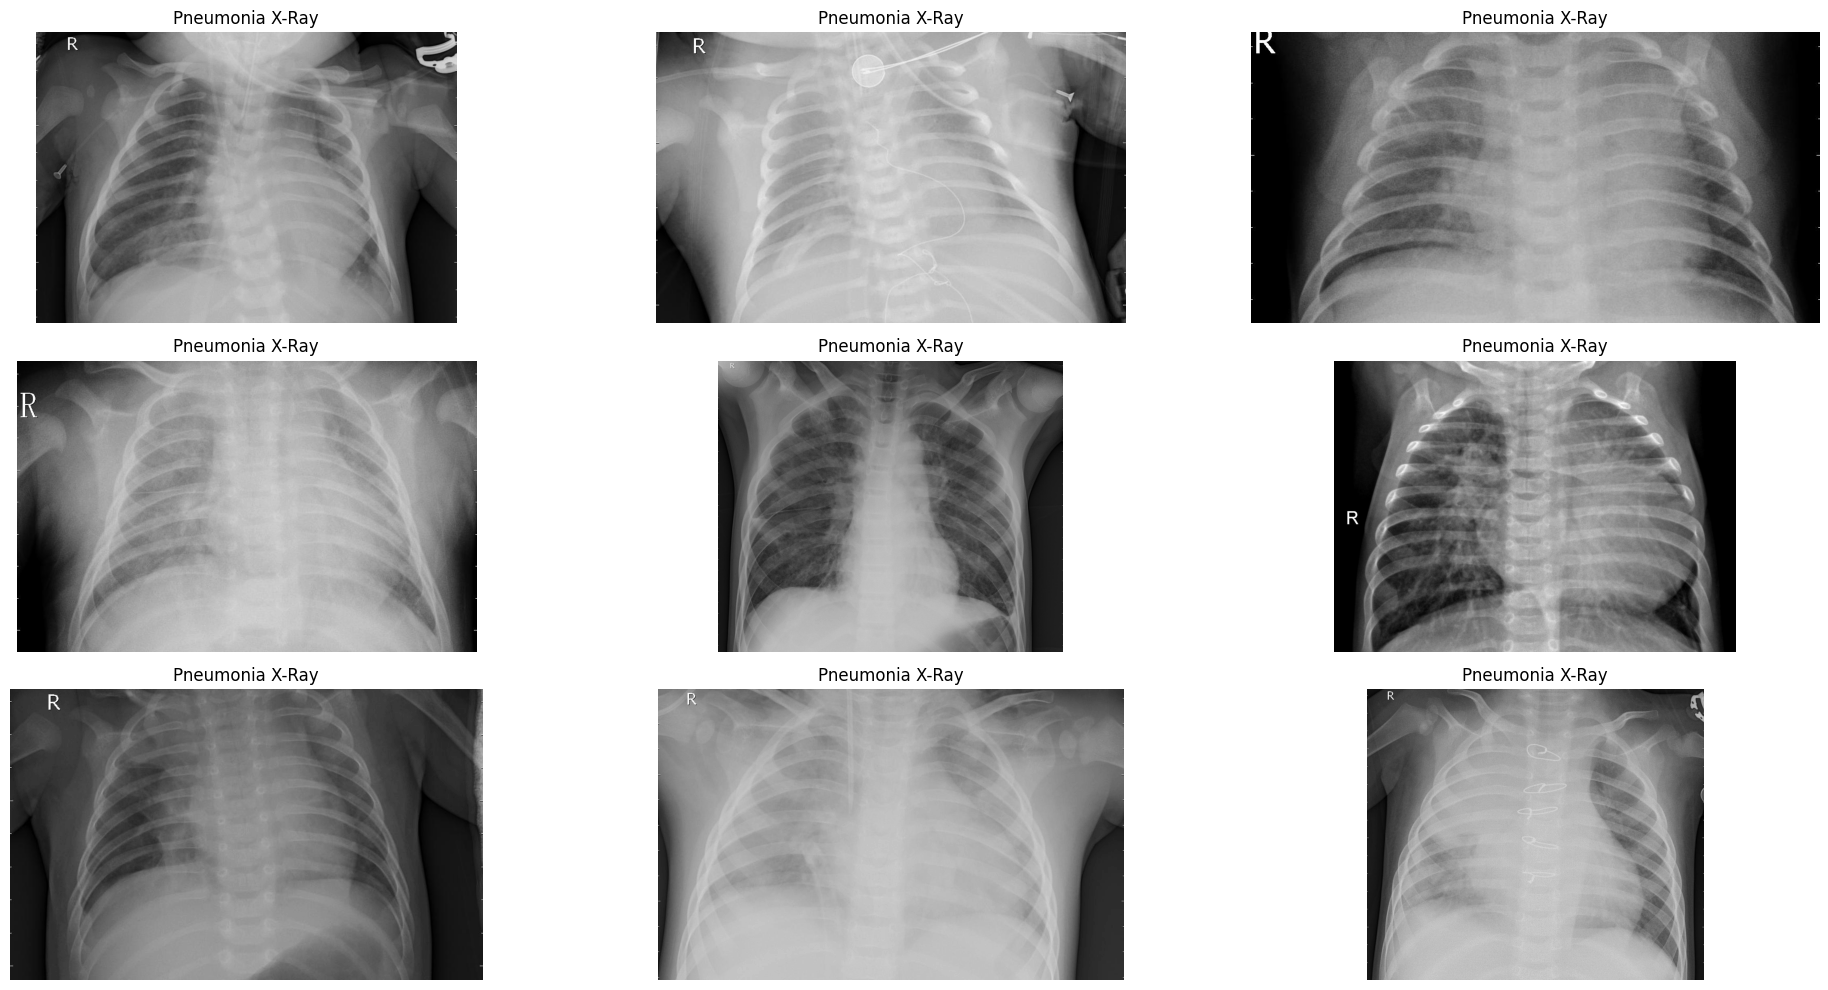

In [13]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Pneumonia X-Ray")
plt.tight_layout()

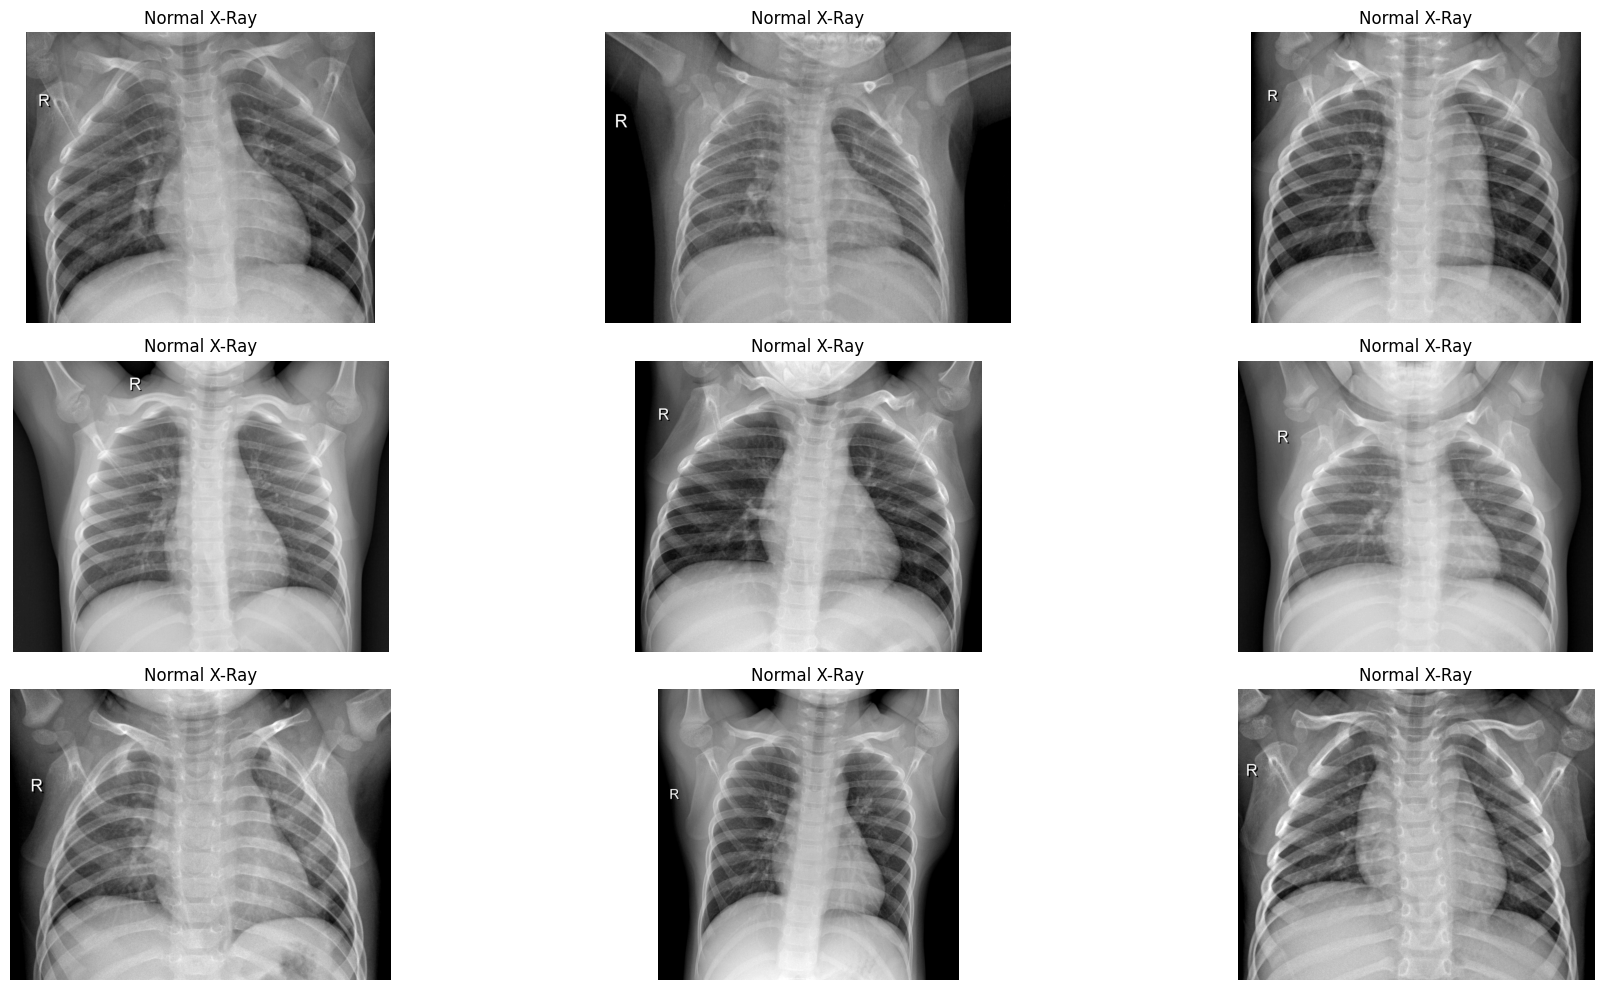

In [14]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Normal X-Ray")

plt.tight_layout()

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-10-2929da9c4937>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


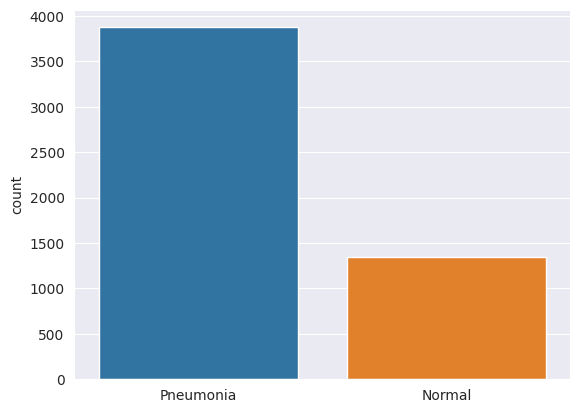

In [15]:
data = get_data('chest_xray/chest_xray/train')

# Creating the countplot
sns.set_style('darkgrid')
sns.countplot(x=data[:, 1])  # Assuming class labels are in the second column

# Adding labels to the plot
plt.xticks([0, 1], ["Pneumonia", "Normal"])

# Display the plot
plt.show()

##### **The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

# Previewing the images of both the classes

Text(0.5, 1.0, 'NORMAL')

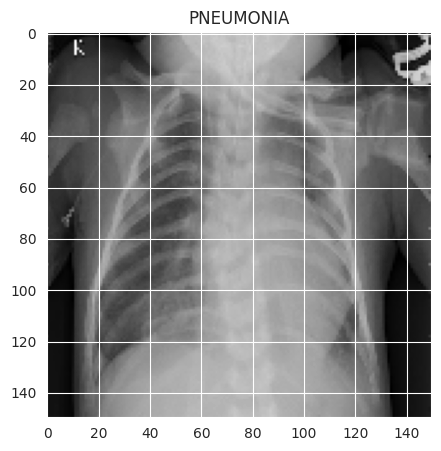

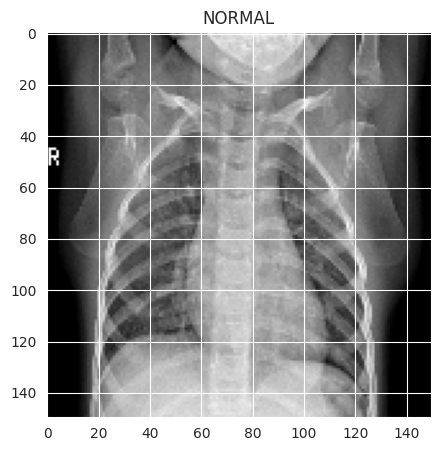

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

**Next, we perform some Data Preprocessing and Data Augmentation before we can proceed with building the model.**

In [17]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

## Normalizing the data

In [18]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

## Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations. Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

For the data augmentation, i choosed to :

1. Randomly rotate some training images by 30 degrees
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width
4. Randomly shift images vertically by 10% of the height
5. Randomly flip images horizontally.

Once our model is ready, we fit the training dataset.

In [19]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Training the Model

##### Basic Structure of CNN

![CNN_IMAGE](https://miro.medium.com/v2/resize:fit:1400/1*7S266Kq-UCExS25iX_I_AQ.png)

**SAME Padding: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride.It is called SAME because, for stride 1 , the output will be the same as the input.**

![CNN_IMAGE2](https://production-media.paperswithcode.com/methods/MaxpoolSample2.png)

# ![CNN_IMAGE3](https://mriquestions.com/uploads/3/4/5/7/34572113/cnn-sample-layout_orig.png)


![Image-1](https://miro.medium.com/v2/resize:fit:678/1*-OM6jQTMNACDX2vAh_lvMQ.png)

In [20]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [22]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 29s 83ms/step - loss: 0.5311 - accuracy: 0.8420 - val_loss: 18.7840 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 13s 79ms/step - loss: 0.2744 - accuracy: 0.8949 - val_loss: 49.7237 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - 13s 79ms/step - loss: 0.2205 - accuracy: 0.9210 - val_loss: 10.8422 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 13s 79ms/step - loss: 0.2039 - accuracy: 0.9277 - val_loss: 0.5498 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/12
163/163 [==============================] - 14s 85ms/step - loss: 0.1805 - accuracy: 0.9381 - val_loss: 0.6888 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/12
163/163 [==============================] - ETA: 0s - loss: 0.2400 - accuracy: 0.9350
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================]

In [23]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 11ms/step - loss: 0.3746 - accuracy: 0.8494
Loss of the model is -  0.3745505213737488
20/20 [==============================] - 0s 10ms/step - loss: 0.3746 - accuracy: 0.8494
Accuracy of the model is -  84.93589758872986 %


# Analysis after Model Training

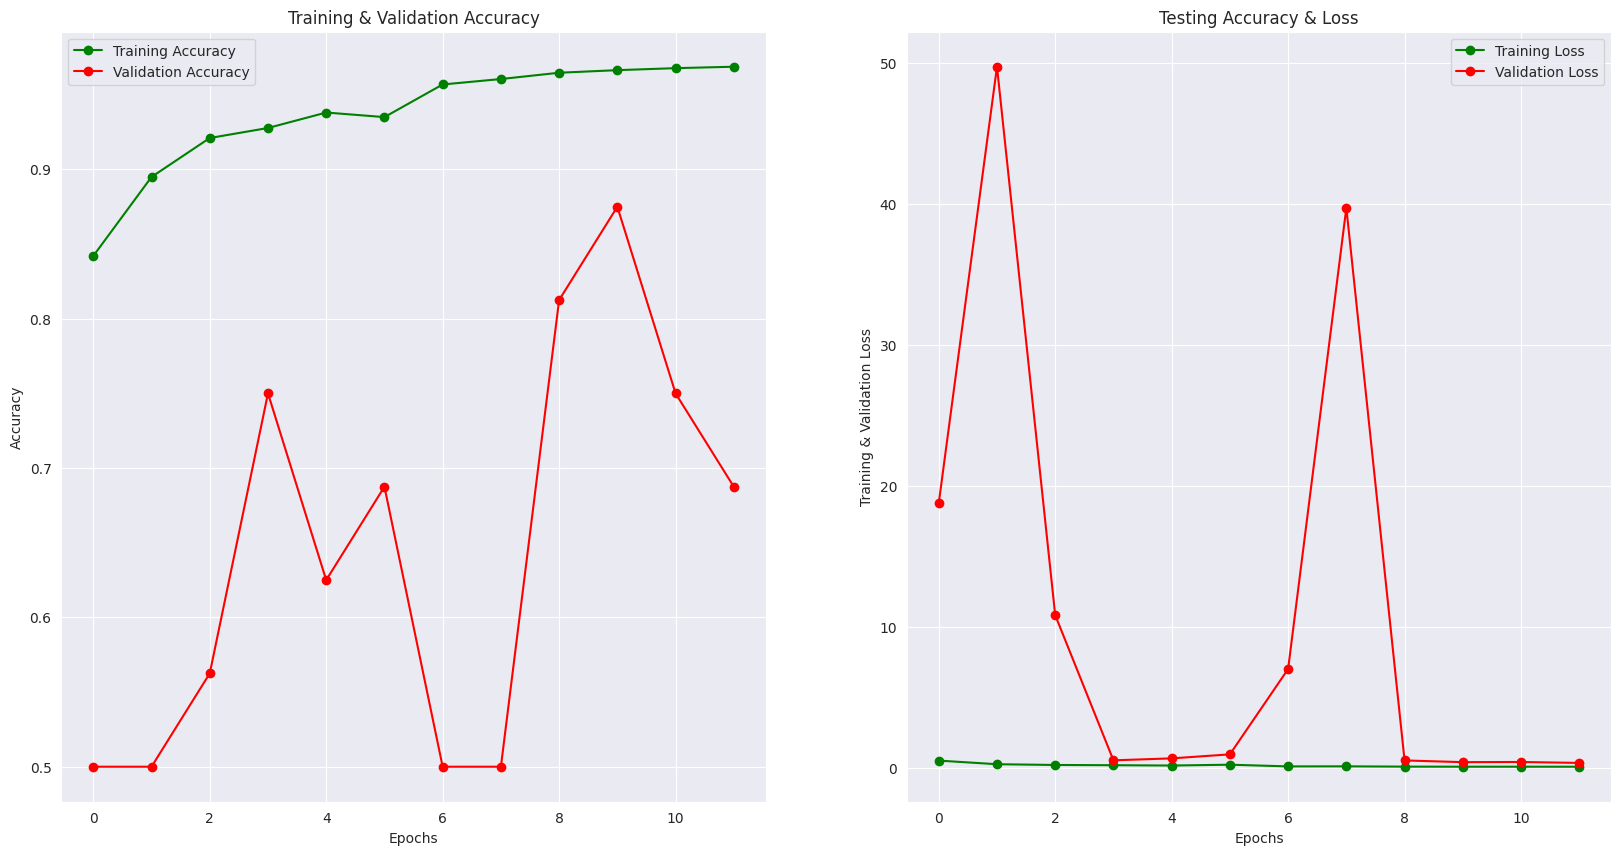

In [24]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Predictions

In [26]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 [==============================] - 1s 15ms/step


array([7.4125886e-01, 5.0634503e-07, 9.9674821e-01, 2.5023762e-03,
       3.3620927e-05, 1.0237683e-03, 2.6341432e-04, 4.0664979e-08,
       4.2707229e-04, 8.7572113e-02, 9.9693799e-01, 4.6109676e-01,
       4.7548347e-06, 7.9873329e-01, 8.3560818e-01], dtype=float32)

In [29]:
binary_predictions = (predictions > 0.5).astype(int)
print(classification_report(y_test, binary_predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.95      0.80      0.87       390
   Normal (Class 1)       0.74      0.93      0.82       234

           accuracy                           0.85       624
          macro avg       0.84      0.87      0.85       624
       weighted avg       0.87      0.85      0.85       624



In [31]:
cm = confusion_matrix(y_test,binary_predictions)
cm

array([[312,  78],
       [ 16, 218]])

In [32]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

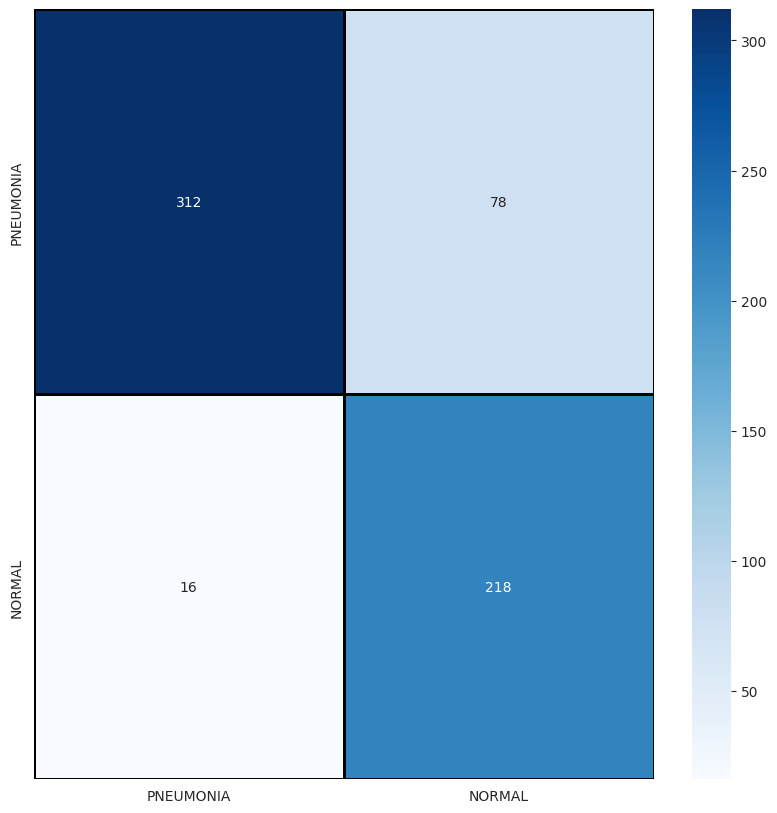

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [34]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

## Some of the Correctly Predicted Classes

In [38]:
i = 0
for c in correct[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

## Some of the Incorrectly Predicted Classes

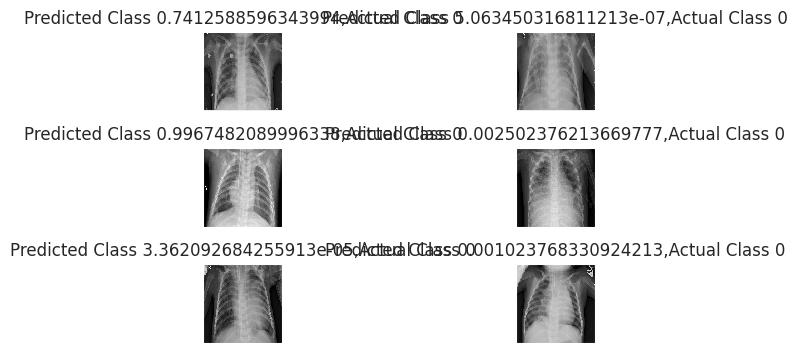

In [39]:
i = 0
for c in incorrect[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [40]:
model.save(../model.h5)

# Pneumonia Detection with Convolutional Neural Networks
Computer Vision can be realized using Convolutional neural networks (CNN) They are neural networks making features extraction over an image before classifying it. The feature extraction performed consists of three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (using the ReLU activation)
* Condense the image to enhance the features (maximum pooling)

The convolution process is illustrated below

![Image-1](https://miro.medium.com/v2/resize:fit:678/1*-OM6jQTMNACDX2vAh_lvMQ.png)


Using convolution filters with different dimensions or values results in differents features extracted

Features are then detected using the reLu activation on each destination pixel.

![Relu](https://miro.medium.com/max/1000/1*3JUMOqugWKB2SDra6x6v0A.png)

Features are the enhanced with MaxPool layers

![Maxpool](https://production-media.paperswithcode.com/methods/MaxpoolSample2.png)

The stride parameters determines the distance between each filters. The padding one determines if we ignore the borderline pixels or not (adding zeros helps the neural network to get information on the border)

![download3.png](https://i1.wp.com/www.brilliantcode.net/wp-content/uploads/2019/08/CNN_Tutorial_padding.png?resize=800%2C529&ssl=1)

The outputs are then concatened in Dense layers

![download4.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzpcDiYIuH4Rw8Th-kQm9RRaJ8ppvoYjqKLQ&usqp=CAU)

By using a sigmoid activation, the neural network determines which class the image belongs to
![download5.png](https://miro.medium.com/v2/resize:fit:1200/1*a04iKNbchayCAJ7-0QlesA.png)

#  Import Packages and Functions
We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* util will provide the locally defined utility functions that have been provided for this assignment
* We will also use several modules from the keras framework for building deep learning models.

Run the next cell to import all the necessary packages.



In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("chest_xray")

['test', 'val', 'train', 'chest_xray', '__MACOSX']

In [42]:
len(os.listdir("chest_xray/train/PNEUMONIA"))

3875

The dataset is divided into three sets:
- 1) Train set
- 2) Validation set
- 3) Test set.

# DATA VISUALIZATION


Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


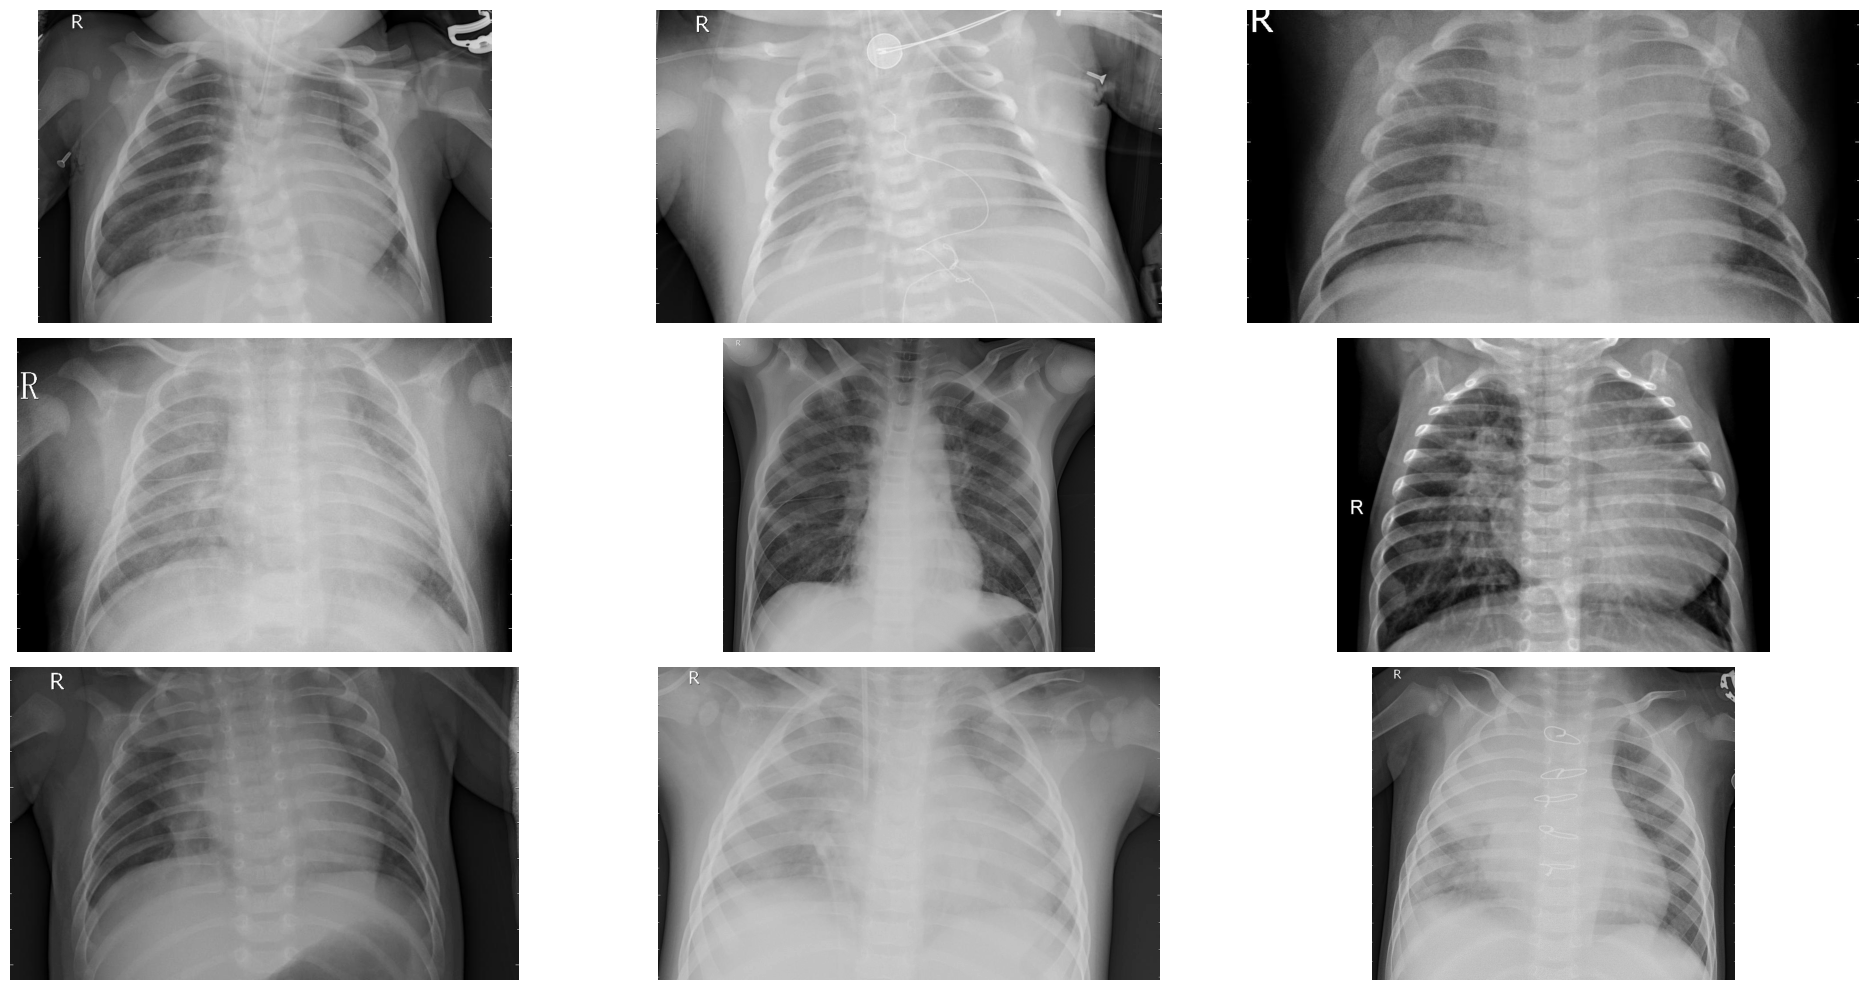

In [43]:
train_dir = "chest_xray/train"
test_dir = "chest_xray/test"
val_dir = "chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

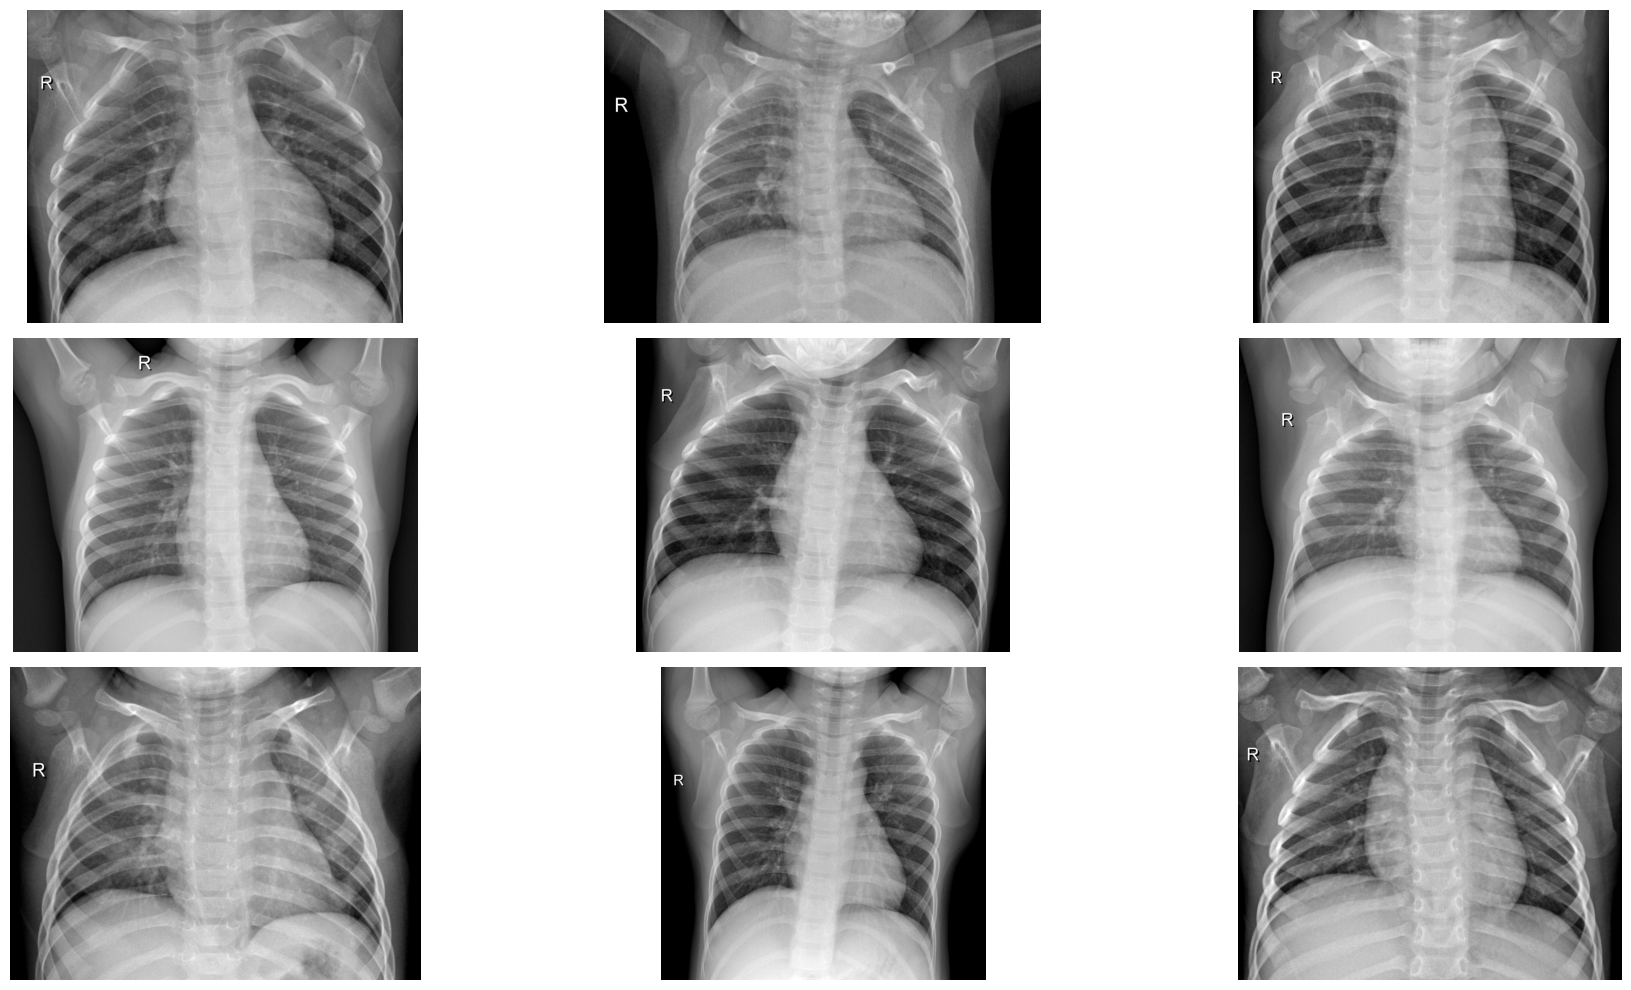

In [44]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

The dimensions of the image are 1210 pixels width and 1450 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 125.3515 and the standard deviation is 44.5035


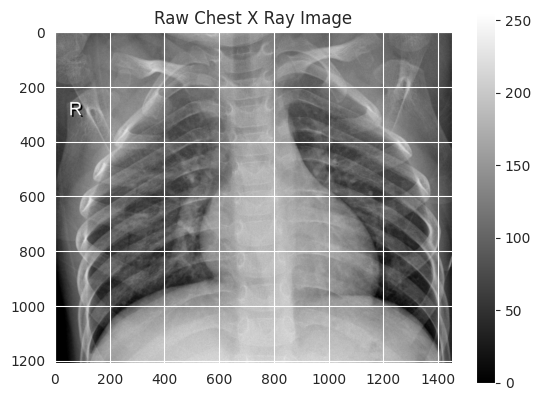

In [46]:
normal_img = os.listdir("chest_xray/train/NORMAL")[0]
normal_dir = "chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Investigate pixel value distribution

<ipython-input-47-d45ac08d2db9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

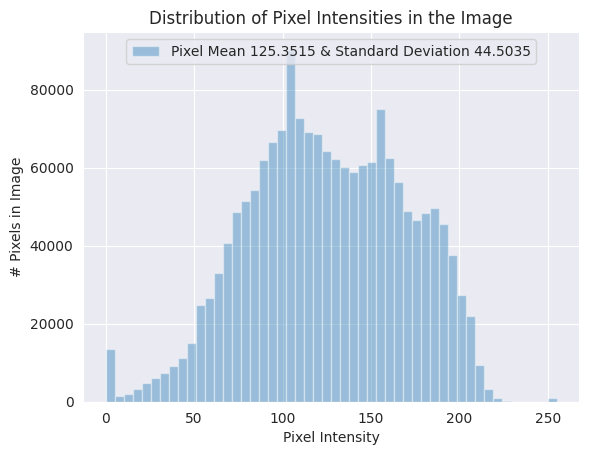

In [47]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 2. Image Preprocessing
Before training, we'll first modify your images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images.
We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [48]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a separate generator fo valid and test sets

A separate generator must be constructed for the validation and testing data instead of using the same generator as for the training data.

When revisiting the generator designed for the training data, it is evident that it performs normalization on each image per batch, utilizing batch-specific statistics. This approach isn't suitable for the test and validation data due to the real-world scenario where images are processed individually rather than in batches.

Using batch statistics for the test and validation data could potentially confer an advantage to the model, which should remain unaware of any information regarding the test data. The procedure that needs to be executed involves normalizing incoming test data based on the statistical measures computed from the training set.


In [49]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir,
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir,
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.9687 and the minimum is -2.4636
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


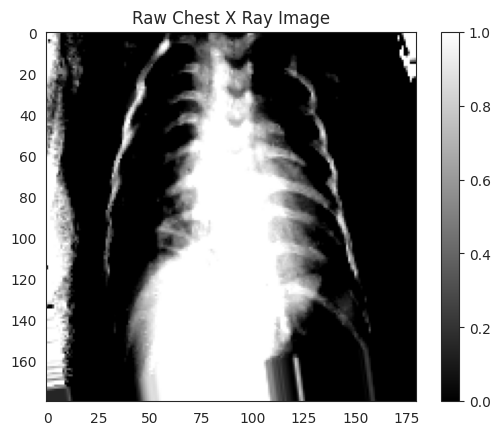

In [50]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

<ipython-input-51-3361fab08a7d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

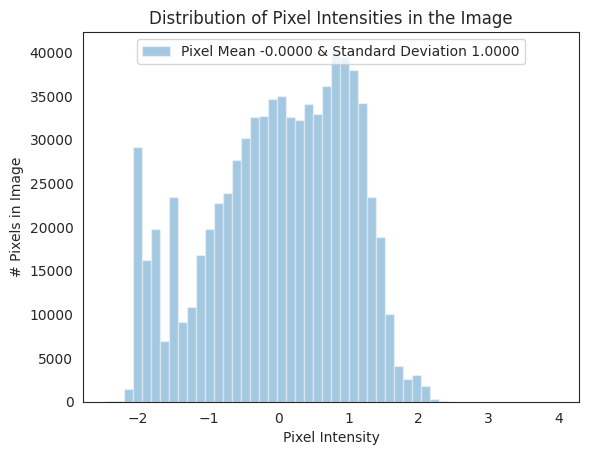

In [51]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model

## Impact of imbalance data on loss function

Loss Function:
$$\mathcal{L}_{cross-entropy}(x_i) = -(y_i \log(f(x_i)) + (1-y_i) \log(1-f(x_i))),$$

We can rewrite the the overall average cross-entropy loss over the entire training set `D` of size `N` as follows:
$$\mathcal{L}_{cross-entropy}(\mathcal{D}) = - \frac{1}{N}\big( \sum_{\text{positive examples}} \log (f(x_i)) + \sum_{\text{negative examples}} \log(1-f(x_i)) \big).$$



When we have an imbalance data, using a normal loss function will result a model that bias toward the dominating class. One solution is to use a weighted loss function. Using weighted loss function will balance the contribution in the loss function.

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

In [52]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_6 (Batc  (None, 176, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                      

In [55]:
r = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.9361 - accuracy: 0.7763

100/100 [==============================] - 22s 149ms/step - loss: 0.9361 - accuracy: 0.7763 - val_loss: 15.9181 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 14s 135ms/step - loss: 0.1769 - accuracy: 0.8150
Epoch 3/10
100/100 [==============================] - 14s 137ms/step - loss: 0.1080 - accuracy: 0.8925
Epoch 4/10
100/100 [==============================] - 13s 133ms/step - loss: 0.1294 - accuracy: 0.8775
Epoch 5/10
100/100 [==============================] - 14s 139ms/step - loss: 0.1191 - accuracy: 0.8938
Epoch 6/10
100/100 [==============================] - 14s 136ms/step - loss: 0.1348 - accuracy: 0.8863
Epoch 7/10
100/100 [==============================] - 13s 133ms/step - loss: 0.1483 - accuracy: 0.8863
Epoch 8/10
100/100 [==============================] - 14s 135ms/step - loss: 0.1295 - accuracy: 0.8913
Epoch 9/10
100/100 [==============================] - 14s 138ms/step - loss: 0.1636 - accuracy: 0.8487
Epoch 10/10
100/100 [====================

Text(0.5, 1.0, 'Accuracy Evolution')

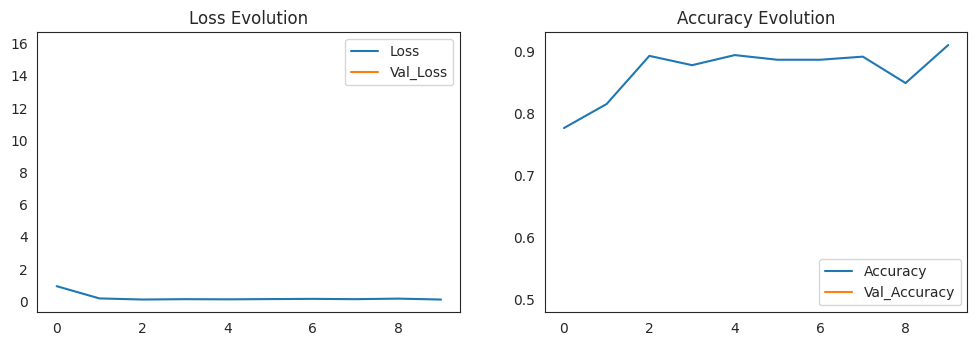

In [56]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [57]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 11s 18ms/step - loss: 1.5749 - accuracy: 0.6955
Test Accuracy: 69.55%
652/652 [==============================] - 84s 129ms/step - loss: 0.3817 - accuracy: 0.8915
Train Accuracy: 89.15%


In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 [==============================] - 11s 17ms/step
[[ 56 178]
 [  2 388]]


0           1  accuracy   macro avg  weighted avg
precision    0.965517    0.685512  0.711538    0.825515      0.790514
recall       0.239316    0.994872  0.711538    0.617094      0.711538
f1-score     0.383562    0.811715  0.711538    0.597639      0.651158
support    234.000000  390.000000  0.711538  624.000000    624.000000

In [60]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[ 81 153]
 [  3 387]]


0           1  accuracy   macro avg  weighted avg
precision    0.964286    0.716667      0.75    0.840476      0.809524
recall       0.346154    0.992308      0.75    0.669231      0.750000
f1-score     0.509434    0.832258      0.75    0.670846      0.711199
support    234.000000  390.000000      0.75  624.000000    624.000000

# Transfer Learning
# DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

![download.png](https://production-media.paperswithcode.com/models/densenet121_spXhNmT.png)

for more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/


In [61]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormali

In [62]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [63]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [64]:
#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
r = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9187

100/100 [==============================] - 17s 169ms/step - loss: 0.0720 - accuracy: 0.9187 - val_loss: 1.0069 - val_accuracy: 0.6875
Epoch 2/10
100/100 [==============================] - 17s 174ms/step - loss: 0.0926 - accuracy: 0.9125
Epoch 3/10
100/100 [==============================] - 16s 161ms/step - loss: 0.0810 - accuracy: 0.9112
Epoch 4/10
100/100 [==============================] - 17s 173ms/step - loss: 0.0795 - accuracy: 0.9287
Epoch 5/10
100/100 [==============================] - 16s 161ms/step - loss: 0.0879 - accuracy: 0.8988
Epoch 6/10
100/100 [==============================] - 17s 174ms/step - loss: 0.0738 - accuracy: 0.9275
Epoch 7/10
100/100 [==============================] - 17s 172ms/step - loss: 0.0685 - accuracy: 0.9262
Epoch 8/10
100/100 [==============================] - 17s 169ms/step - loss: 0.0700 - accuracy: 0.9413
Epoch 9/10
100/100 [==============================] - 16s 160ms/step - loss: 0.0634 - accuracy: 0.9287
Epoch 10/10
100/100 [=====================

Text(0.5, 1.0, 'Accuracy Evolution')

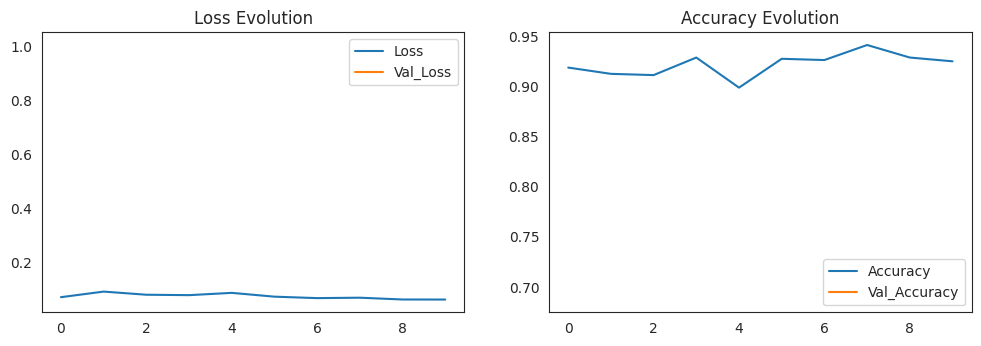

In [67]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [68]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 15s 24ms/step - loss: 0.3526 - accuracy: 0.8397
Test Accuracy: 83.97%
652/652 [==============================] - 87s 134ms/step - loss: 0.1494 - accuracy: 0.9456
Train Accuracy: 94.56%


### Evaluation

In [69]:
predicted_vals = model.predict(test, steps=len(test))

624/624 [==============================] - 16s 23ms/step


In [70]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[148  86]
 [ 15 375]]


0           1  accuracy   macro avg  weighted avg
precision    0.907975    0.813449  0.838141    0.860712      0.848896
recall       0.632479    0.961538  0.838141    0.797009      0.838141
f1-score     0.745592    0.881316  0.838141    0.813454      0.830420
support    234.000000  390.000000  0.838141  624.000000    624.000000

# VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

![download7.png](https://miro.medium.com/v2/resize:fit:1400/1*NNifzsJ7tD2kAfBXt3AzEg.png)

In [72]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [73]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [74]:
vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

model = Sequential()
model.add(vgg16_model.layers[0])

In [75]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [76]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.2425 - accuracy: 0.6675 - precision: 0.8851 - recall: 0.6231

100/100 [==============================] - 29s 178ms/step - loss: 0.2425 - accuracy: 0.6675 - precision: 0.8851 - recall: 0.6231 - val_loss: 21.2337 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 18s 174ms/step - loss: 0.2150 - accuracy: 0.7350 - precision: 0.9264 - recall: 0.7063
Epoch 3/10
100/100 [==============================] - 17s 173ms/step - loss: 0.1986 - accuracy: 0.7513 - precision: 0.9289 - recall: 0.7219
Epoch 4/10
100/100 [==============================] - 17s 167ms/step - loss: 0.1914 - accuracy: 0.7588 - precision: 0.9191 - recall: 0.7359
Epoch 5/10
100/100 [==============================] - 17s 165ms/step - loss: 0.1962 - accuracy: 0.7312 - precision: 0.9200 - recall: 0.6981
Epoch 6/10
100/100 [==============================] - 17s 165ms/step - loss: 0.1463 - accuracy: 0.8163 - precision: 0.9664 - recall: 0.7783
Epoch 7/10
100/100 [==============================] - 15s 154ms/step - loss

Text(0.5, 1.0, 'Accuracy Evolution')

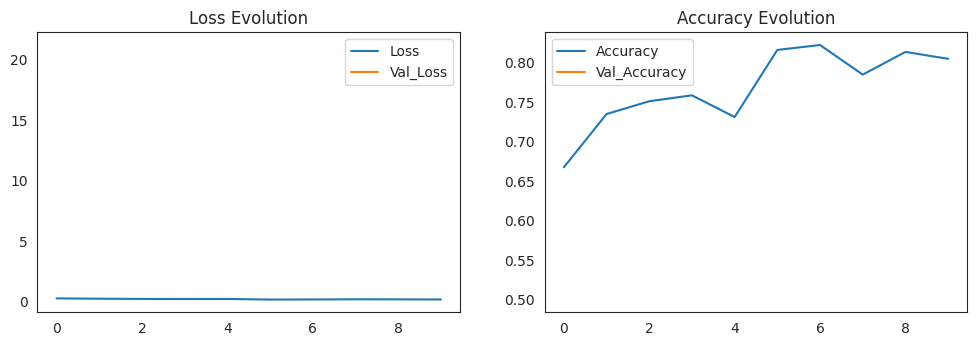

In [77]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [78]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 13s 20ms/step - loss: 0.8207 - accuracy: 0.5897 - precision: 0.9653 - recall: 0.3564
Test Accuracy: 58.97%
652/652 [==============================] - 89s 137ms/step - loss: 1.0724 - accuracy: 0.4977 - precision: 0.9976 - recall: 0.3246
Train Accuracy: 49.77%


### Evaluation

In [79]:
predicted_vals = vgg16_model.predict(test, steps=len(test))

624/624 [==============================] - 12s 18ms/step


In [80]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[226   8]
 [252 138]]


0           1  accuracy   macro avg  weighted avg
precision    0.472803    0.945205  0.583333    0.709004      0.768055
recall       0.965812    0.353846  0.583333    0.659829      0.583333
f1-score     0.634831    0.514925  0.583333    0.574878      0.559890
support    234.000000  390.000000  0.583333  624.000000    624.000000

# ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [81]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [82]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [83]:
resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [84]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.6400 - precision: 0.8531 - recall: 0.6193

100/100 [==============================] - 62s 170ms/step - loss: 0.2805 - accuracy: 0.6400 - precision: 0.8531 - recall: 0.6193 - val_loss: 3.2283 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 15s 150ms/step - loss: 0.2111 - accuracy: 0.7100 - precision: 0.9274 - recall: 0.6716
Epoch 3/10
100/100 [==============================] - 15s 153ms/step - loss: 0.1993 - accuracy: 0.7613 - precision: 0.9214 - recall: 0.7314
Epoch 4/10
100/100 [==============================] - 16s 160ms/step - loss: 0.2240 - accuracy: 0.7225 - precision: 0.9011 - recall: 0.6865
Epoch 5/10
100/100 [==============================] - 15s 148ms/step - loss: 0.1848 - accuracy: 0.7437 - precision: 0.9214 - recall: 0.7140
Epoch 6/10
100/100 [==============================] - 16s 161ms/step - loss: 0.1842 - accuracy: 0.7700 - precision: 0.9281 - recall: 0.7453
Epoch 7/10
100/100 [==============================] - 16s 155ms/step - loss:

Text(0.5, 1.0, 'Accuracy Evolution')

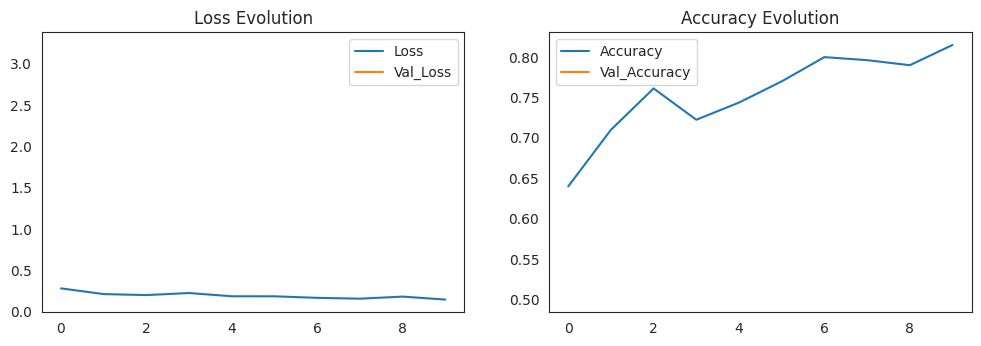

In [85]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [87]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 14s 22ms/step - loss: 2.1347 - accuracy: 0.7067 - precision: 0.6819 - recall: 0.9949
Test Accuracy: 70.67%
652/652 [==============================] - 100s 153ms/step - loss: 0.7695 - accuracy: 0.7851 - precision: 0.7854 - recall: 0.9778
Train Accuracy: 78.51%


### Evaluation

In [88]:
predicted_vals = resnet_model.predict(test, steps=len(test))

624/624 [==============================] - 13s 20ms/step


In [89]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[ 55 179]
 [ 10 380]]


0           1  accuracy   macro avg  weighted avg
precision    0.846154    0.679785  0.697115    0.762970      0.742174
recall       0.235043    0.974359  0.697115    0.604701      0.697115
f1-score     0.367893    0.800843  0.697115    0.584368      0.638487
support    234.000000  390.000000  0.697115  624.000000    624.000000

# InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [90]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [91]:
inception_model = Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [92]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.6488 - precision: 0.8771 - recall: 0.6128

100/100 [==============================] - 63s 178ms/step - loss: 0.2636 - accuracy: 0.6488 - precision: 0.8771 - recall: 0.6128 - val_loss: 1.7432 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 16s 163ms/step - loss: 0.2040 - accuracy: 0.7450 - precision: 0.9158 - recall: 0.7199
Epoch 3/10
100/100 [==============================] - 16s 155ms/step - loss: 0.1549 - accuracy: 0.8338 - precision: 0.9552 - recall: 0.8167
Epoch 4/10
100/100 [==============================] - 15s 154ms/step - loss: 0.1757 - accuracy: 0.8425 - precision: 0.9505 - recall: 0.8331
Epoch 5/10
100/100 [==============================] - 16s 155ms/step - loss: 0.1709 - accuracy: 0.8225 - precision: 0.9331 - recall: 0.8144
Epoch 6/10
100/100 [==============================] - 15s 149ms/step - loss: 0.1162 - accuracy: 0.8562 - precision: 0.9639 - recall: 0.8411
Epoch 7/10
100/100 [==============================] - 16s 161ms/step - loss:

Text(0.5, 1.0, 'Accuracy Evolution')

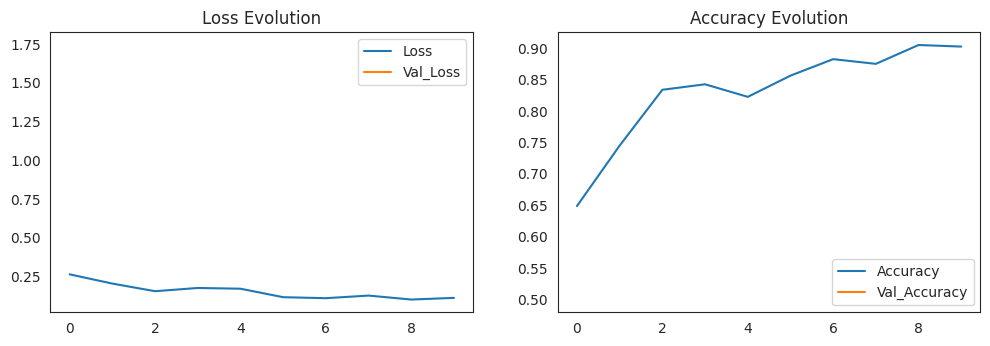

In [93]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [94]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 16s 25ms/step - loss: 0.3539 - accuracy: 0.8654 - precision: 0.8355 - recall: 0.9769
Test Accuracy: 86.54%
652/652 [==============================] - 88s 135ms/step - loss: 0.1668 - accuracy: 0.9525 - precision: 0.9784 - recall: 0.9572
Train Accuracy: 95.25%


## Comparing different models

In [95]:
model_mae_scores_dict = {'CNN': 84.93, 'CNN_2': 69.55, 'DenseNet' : 83.97, 'VGG16' : 58.97, 'ResNet' : 70.67, 'InceptionNet' : 86.54}

In [96]:
model_mae_scores_dict

{'CNN': 84.93,
 'CNN_2': 69.55,
 'DenseNet': 83.97,
 'VGG16': 58.97,
 'ResNet': 70.67,
 'InceptionNet': 86.54}

In [101]:
order =sorted(model_mae_scores_dict.items(), key=lambda x: x[1])
order

[('VGG16', 58.97),
 ('CNN_2', 69.55),
 ('ResNet', 70.67),
 ('DenseNet', 83.97),
 ('CNN', 84.93),
 ('InceptionNet', 86.54)]

In [102]:
model_names = [item[0] for item in order]
mae_values = [item[1] for item in order]

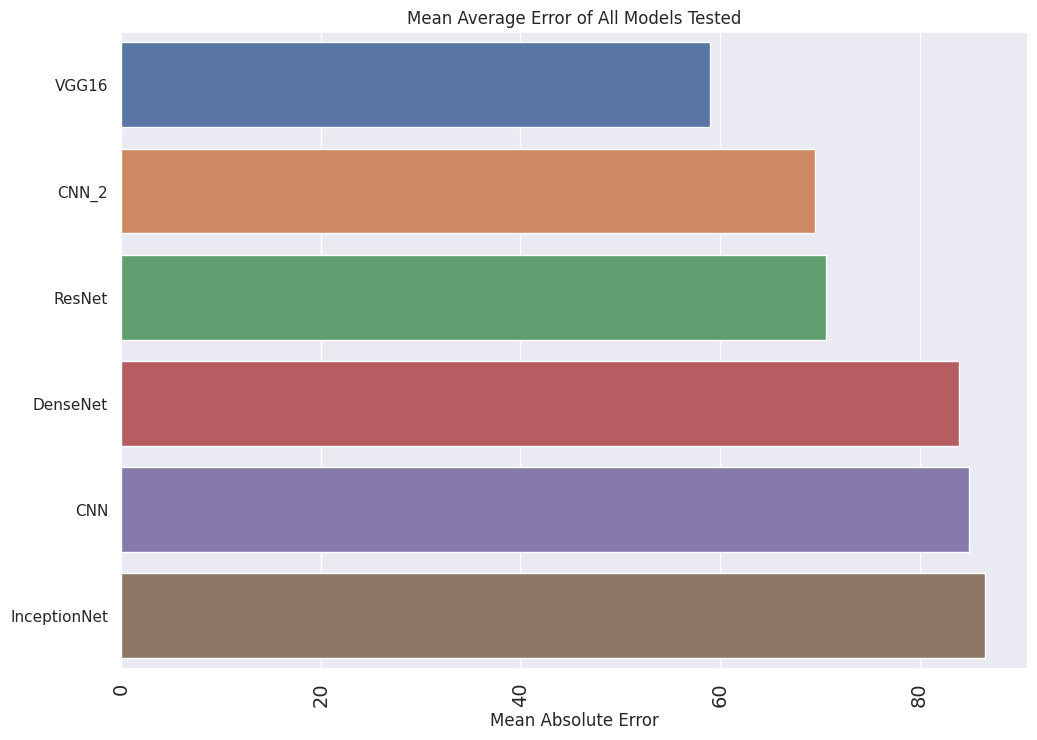

In [104]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=mae_values, y=model_names, orient='h')

plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical', fontsize=14)
plt.title('Mean Average Error of All Models Tested')
plt.show()